# Cal-ITP Style Guide

Import color palette from `calitp_color_palette`

### altair / plotnine
* For `altair`, `plotnine`, pass a chart through `styleguide` chart configuration functions.
* `altair`: render charts in notebook with `alt.themes.register("calitp_theme", styleguide.calitp_theme)`. 
<br>To have PNG saved with theme, use `styleguide.preset_chart_config()`.
* `plotnine`: use `styleguide.preset_plotnine_config()`

### matplotlib / seaborn
* `matplotlib` and `seaborn` share same style template. 
* Import using `plt.style.use(f'{PATH}/calitp.mplstyle')`. 
    * Relative to `example_report/`, the relative path is defined as `PATH="../_shared_utils/shared_utils/"`.

In [1]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown
from plotnine import *

from shared_utils import geography_utils, styleguide
from shared_utils import calitp_color_palette as cp 

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.


Import Google Fonts on the fly to use for `altair`

In [2]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Raleway');
@import url('https://fonts.googleapis.com/css?family=Nunito+Sans');
@import url('https://fonts.googleapis.com/css?family=Bitter');
</style>

In [3]:
TABULAR_DATA = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv"
df = pd.read_csv(TABULAR_DATA)

df = geography_utils.aggregate_by_geography(
    df[(df.payment.notna()) & (df.pickup_borough.notna())], 
    group_cols = ["pickup_zone"],
    sum_cols = ["passengers"],
)

df.head(2)

,pickup_zone,passengers
0,Lenox Hill West,215
1,Upper West Side South,218


## Color Palette

Color palettes found in `calitp_color_palette.py`.
* `CALITP_CATEGORY_BRIGHT_COLORS`: categorical
* `CALITP_CATEGORY_BOLD_COLORS`: categorical
* `CALITP_DIVERGING_COLORS`: numeric or categorical
* `CALITP_SEQUENTIAL_COLOR`: numeric

### Bright

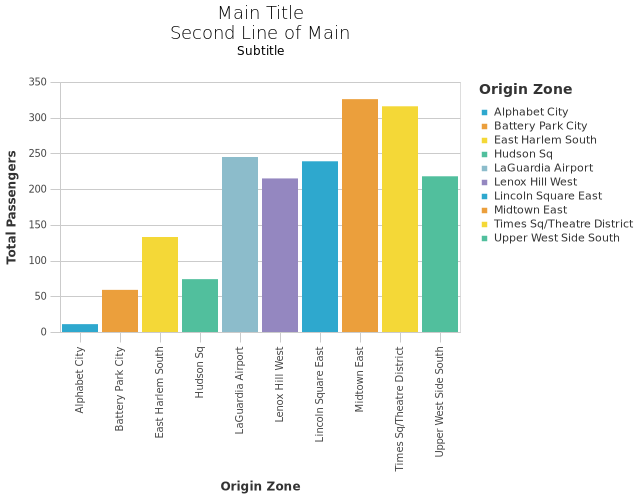

### Bold

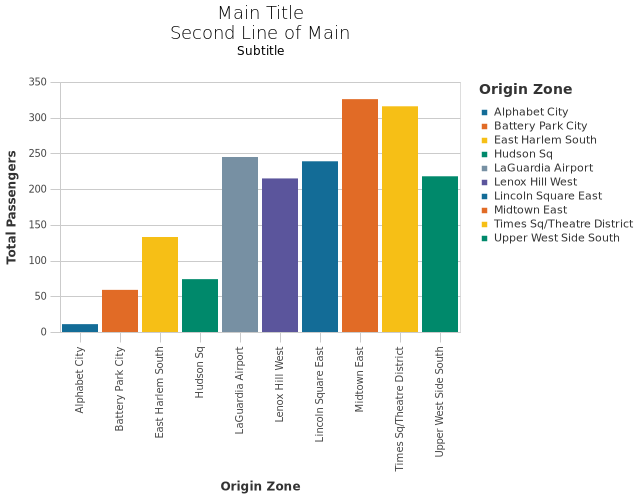

### Diverging

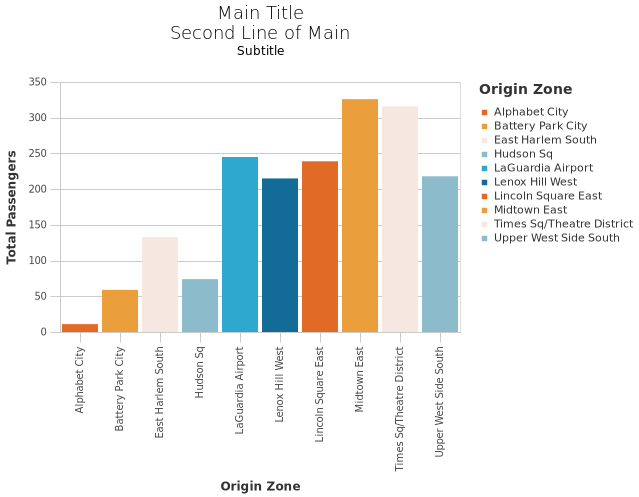

### Sequential

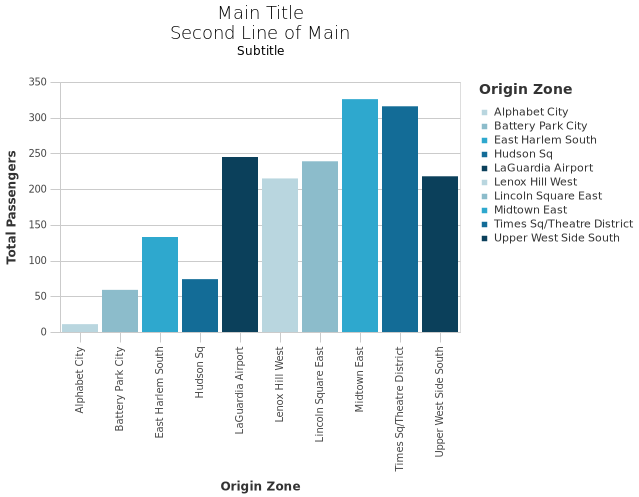

In [4]:
import altair_saver
alt.renderers.enable('altair_saver', fmts=['png'])

def make_chart(df, colorscale):
    chart = (alt.Chart(df)
             .mark_bar()
             .encode(
                 x=alt.X("pickup_zone:N", title="Origin Zone"),
                 y=alt.Y("sum(passengers):Q", title="Total Passengers"),
                 color = alt.Color("pickup_zone:N", 
                                   scale=alt.Scale(range=colorscale),
                                   legend = alt.Legend(title="Origin Zone")
                                  ),
             ).properties(title={"text": ["Main Title", "Second Line of Main"], 
                                 "subtitle": "Subtitle"})
    )
    
    chart = styleguide.preset_chart_config(chart)
    display(chart)

display(Markdown("### Bright"))
make_chart(df.head(10), cp.CALITP_CATEGORY_BRIGHT_COLORS)
display(Markdown("### Bold"))
make_chart(df.head(10), cp.CALITP_CATEGORY_BOLD_COLORS)
display(Markdown("### Diverging"))
make_chart(df.head(10), cp.CALITP_DIVERGING_COLORS)
display(Markdown("### Sequential"))
make_chart(df.head(10), cp.CALITP_SEQUENTIAL_COLORS)

## altair

### render chart in notebook

```
import altair as alt

alt.themes.register("calitp_theme", styleguide.calitp_theme)
# enable
alt.themes.enable("calitp_theme")
alt.renderers.enable(fmts="html")
```

### render chart as PNG to save locally or display in GitHub notebook

```
import altair_saver
alt.renderers.enable('altair_saver', fmts=['png'])

# Make chart
chart = (alt.Chart())

# Style chart by passing it through the `styleguide.preset_chart_config()` function.
chart = styleguide.preset_chart_config(chart)

# Display chart and render in checked-in GitHub notebook
display(chart)

# Save chart 
chart.save()
```

In [5]:
# Render in notebook
alt.themes.register("calitp_theme", styleguide.calitp_theme)
# enable
alt.themes.enable("calitp_theme")
alt.renderers.enable(fmts="html")

RendererRegistry.enable('altair_saver')

In [6]:
(alt.Chart(df.head(10))
     .mark_bar()
     .encode(
         x=alt.X("pickup_zone:N", title="Pickup Zone"),
         y=alt.Y("sum(passengers):Q", title="Total Passengers"),
         color = alt.Color("pickup_zone:N", 
                           scale=alt.Scale(range=cp.CALITP_CATEGORY_BRIGHT_COLORS)
                          ),
     ).properties(title="Passengers by Pickup Zone")
)

alt.Chart(...)

## matplotlib / seaborn

Both `matplotlib` and `seaborn` share the same style template. 

Import `.mplstyle` using `plt.style.use(f'{PATH}/calitp.mplstyle')`

In [7]:
plt.style.use('../_shared_utils/shared_utils/calitp.mplstyle')

Text(0.5, 1.0, 'Passengers by Pickup Zone')

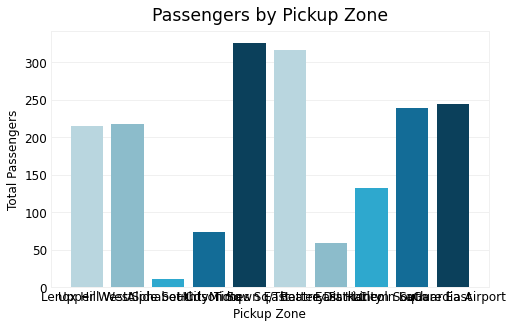

In [8]:
plt.bar("pickup_zone", height="passengers", data=df.head(10), 
        color=cp.CALITP_SEQUENTIAL_COLORS)
plt.xlabel("Pickup Zone")
plt.ylabel("Total Passengers")
plt.title("Passengers by Pickup Zone")

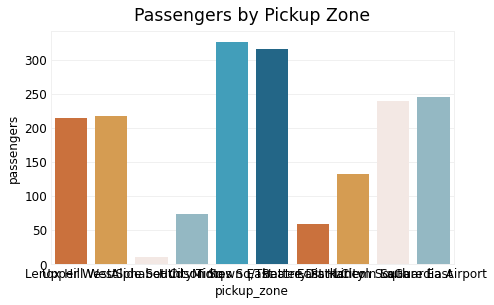

In [9]:
sns_plot = (sns.barplot(x=df.head(10).pickup_zone, y=df.head(10).passengers, ci=None, 
                       palette=cp.CALITP_DIVERGING_COLORS
                       )
            .set_title("Passengers by Pickup Zone")
           )
chart = sns_plot.get_figure()
chart.tight_layout()

## plotnine

```
# Make chart
chart = ggplot()

# Style chart by passing it through the `styleguide.preset_plotnine_config()` function.
chart = styleguide.preset_plotnine_config(chart)
```

findfont: Font family ['Nunito Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


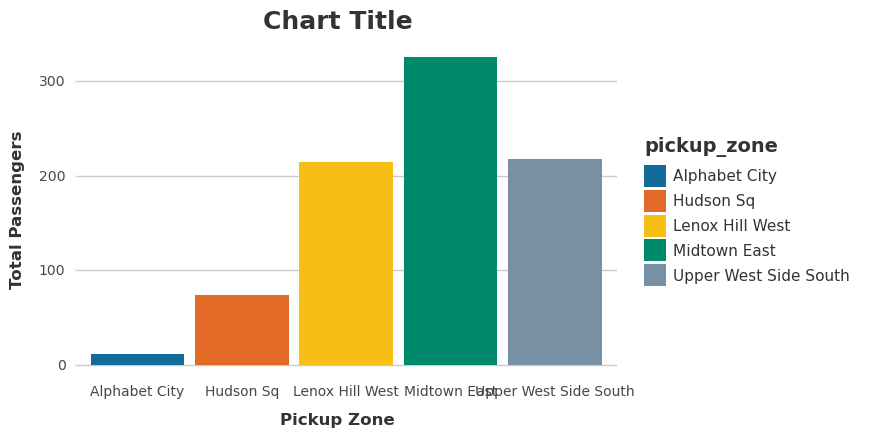

<ggplot: (8784923582308)>

In [10]:
chart = (ggplot(df.head(5), aes(x='pickup_zone', y="passengers", fill="pickup_zone"))
         + geom_col()   
)

chart = (styleguide.preset_plotnine_config(chart)
         + scale_fill_manual(values=cp.CALITP_CATEGORY_BOLD_COLORS)
         + labs(title="Chart Title", x="Pickup Zone", y="Total Passengers")
        )

chart